## Librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
 

## Cargamos el dataset

In [2]:
axis_data = pd.read_csv(r"comprar_alquilar.csv") 
print(axis_data.tail(10))

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
192      4653            1024         447           703    16952    392957   
193      3390             881         194           584    34601    304112   
194      2969             623          72           620    29663    289205   
195      4169            1292          48           333    28503    239872   
196      4054            1095         371           440    22183    223971   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  comprar  
192             0      0        3        0  
193             2      2        5        0  
194   

In [3]:
scaler = StandardScaler()
df = axis_data.drop(['comprar'],axis=1)
scaler.fit(df)
x_scaled = scaler.transform(df)

## PCA

In [4]:
pca = PCA(n_components=9)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

print("shape of x_pca", x_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma', sum(expl[0:5]))

shape of x_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma 0.852406211771431


## Graficacion 

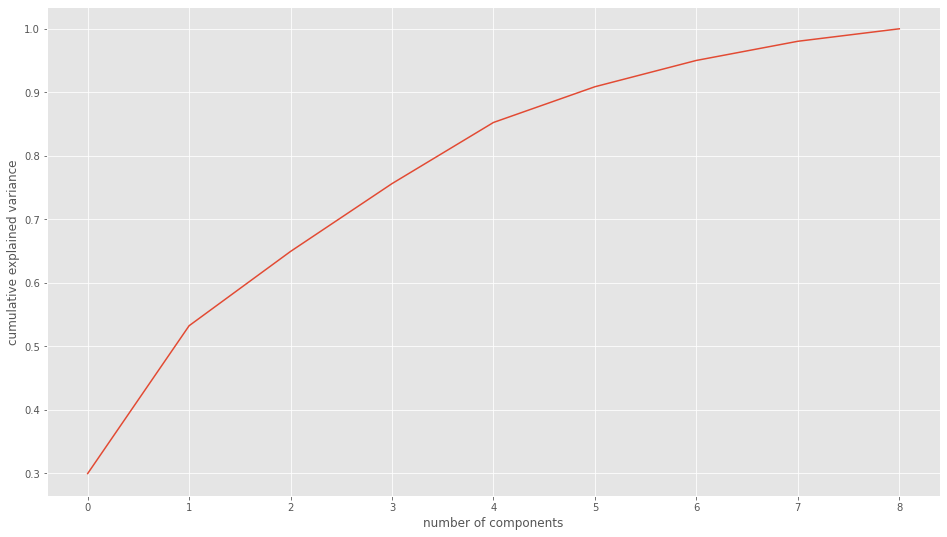

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

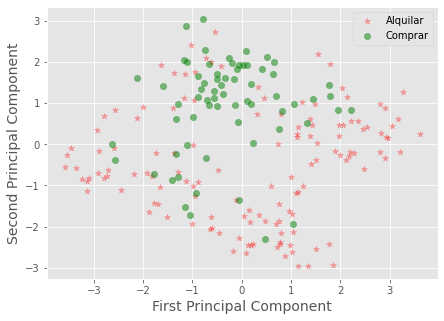

In [6]:
Xax=x_pca[:,0]
Yax=x_pca[:,1]
labels= axis_data['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()